# **A. Identification**

## **Problem Statement**
SOKO Finansial berkomitmen untuk meningkatkan literasi keuangan di kalangan generasi muda, agar mereka dapat mengelola keuangan pribadi dengan lebih bijak. Salah satu aspek kunci dalam pengelolaan keuangan adalah memahami pola pengeluaran dan konsumsi, termasuk bagaimana individu berinteraksi dengan layanan atau aplikasi tertentu.

Dalam konteks ini, fenomena joki Strava menarik untuk dianalisis. Praktik ini mencerminkan ketidakjujuran dalam pencatatan aktivitas olahraga di aplikasi Strava, yang dapat menunjukkan pola pengambilan keputusan konsumsi yang tidak transparan. Lebih dari sekadar isu di dunia olahraga, fenomena ini bisa mencerminkan kebiasaan yang berpotensi memengaruhi cara seseorang mengelola keuangan, termasuk dalam hal disiplin, kejujuran, dan tanggung jawab finansial.

Dataset yang tersedia berisi berbagai komentar dari pengguna yang mengekspresikan pandangan dan sentimen mereka terhadap fenomena ini. Melalui analisis ini, kita dapat menggali bagaimana praktek seperti joki Strava berkaitan dengan persepsi generasi muda terhadap integritas, pengelolaan diri, dan dampaknya terhadap pemahaman keuangan mereka.

Tantangan utamanya adalah menemukan korelasi antara fenomena ini dengan kebiasaan finansial pengguna serta bagaimana wawasan dari studi ini dapat digunakan untuk meningkatkan kesadaran generasi muda dalam mengelola keuangan mereka secara lebih sehat dan bertanggung jawab.

## **Tujuan**
Tujuan utama dari analisis ini adalah:

*   Menganalisis hubungan antara komentar-komentar yang berfokus pada joki Strava dan persepsi tentang perilaku konsumsi yang tidak transparan atau tidak jujur, yang berpotensi mengarah pada pembentukan kebiasaan finansial yang buruk.
*   Memberikan wawasan kepada SOKO Finansial tentang bagaimana fenomena ini dapat digunakan sebagai contoh untuk meningkatkan kesadaran edukasi finansial di kalangan generasi muda, khususnya mengenai pentingnya kejujuran dalam pengelolaan keuangan pribadi dan pengaruh kebiasaan buruk terhadap keputusan finansial.




# **B. Import dataset**

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv('hasil_sentimen_textblob.csv', delimiter=';')
df

,Comment,Sentiment
0,joki strava bawa hp pas lari,Netral
1,anjir sumpah yang joki strava,Netral
2,misal jadi joki strava pelanggan kasih iphone ...,Negatif
3,tidak naik sepeda stravany lari bukan strava s...,Negatif
4,joki strava bawa pergi hp,Negatif
...,...,...
580,pernah pas kerja ngidupin starva kerja jalanla...,Positif
581,cara buka awal usaha ginian gimana hari atoga ...,Netral
582,serius joki nya,Negatif
583,mau open joki lumayan kardio dapet duit,Netral


# **C. Data Overview**

Dataset ini terdiri dari **585 data** dan berisi dua kolom yang terkait dengan analisis sentimen terhadap joki strava:

`Comment`: Kolom ini berisi full text komentar user sosmed yang mencerminkan pendapat, pengalaman, atau opini mereka terhadap joki strava.

`Sentiment`: Kolom ini mengkategorikan sentimen yang teridentifikasi dalam komentar tersebut, yaitu positif, netral, dan negatif.



## **C1. Data Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    585 non-null    object
 1   Sentiment  585 non-null    object
dtypes: object(2)
memory usage: 9.3+ KB


Terdapat **1 Tipe Data** pada dataset `joki_strava`:

*   `object`: Comment dan Sentiment

## **C2. Number of rows and columns**

In [ ]:
# Checking the rows and columns
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 585 rows and 2 columns


## **C3. Data Describe**

In [ ]:
df.describe()

,Comment,Sentiment
count,585,585
unique,568,3
top,buat apa,Netral
freq,5,256


## **C4. Missing Values and Duplicated Data**

In [ ]:
# Checking Missing Values
print('Missing values: ')
print(df.isnull().sum())
print("\n")

Missing values: 
Comment      0
Sentiment    0
dtype: int64




In [ ]:
# Check duplicated data
duplikat = df.duplicated().sum()
print(f'Jumlah data duplikat sebanyak {duplikat} data ')

Jumlah data duplikat sebanyak 15 data 


# **D. Data Cleaning**

## **D1. Drop Column**

In [ ]:
# Drop duplicates column Comment
df_unique = df.drop_duplicates(subset=['Comment'])

# Verifying the result by checking the new shape and unique counts
df_unique_shape = df_unique.shape
unique_comment_count_updated = df_unique['Comment'].nunique()

df_unique_shape, unique_comment_count_updated


((568, 2), 568)

In [ ]:
df_unique.shape

(568, 2)

In [ ]:
# Make copy data
df_clean = df_unique.copy()

In [ ]:
# Check the dataset
df_clean

,Comment,Sentiment
0,joki strava bawa hp pas lari,Netral
1,anjir sumpah yang joki strava,Netral
2,misal jadi joki strava pelanggan kasih iphone ...,Negatif
3,tidak naik sepeda stravany lari bukan strava s...,Negatif
4,joki strava bawa pergi hp,Negatif
...,...,...
580,pernah pas kerja ngidupin starva kerja jalanla...,Positif
581,cara buka awal usaha ginian gimana hari atoga ...,Netral
582,serius joki nya,Negatif
583,mau open joki lumayan kardio dapet duit,Netral


# **E. EDA**

## **E1. Sentiment Distribution**

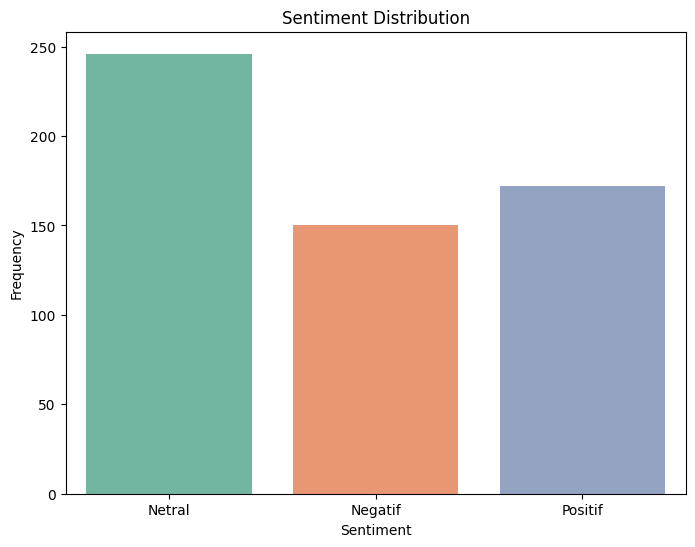

,count
Sentiment,
Netral,246
Positif,172
Negatif,150


In [ ]:
# Checking the distribution of sentiment categories
sentiment_distribution_updated = df_clean['Sentiment'].value_counts()

# Plotting sentiment distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df_clean, x='Sentiment', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Displaying the sentiment distribution
sentiment_distribution_updated


## **E2. WordCloud**

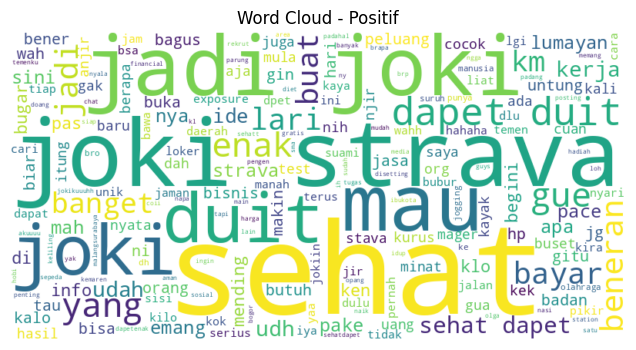

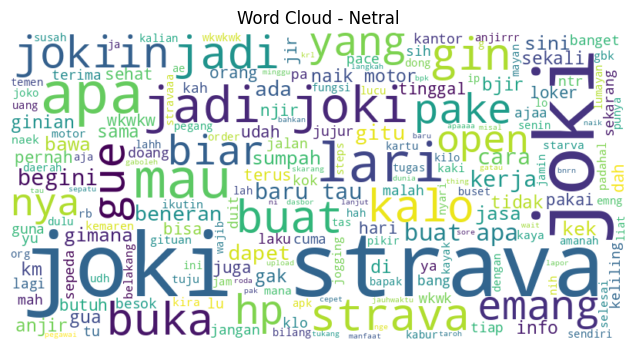

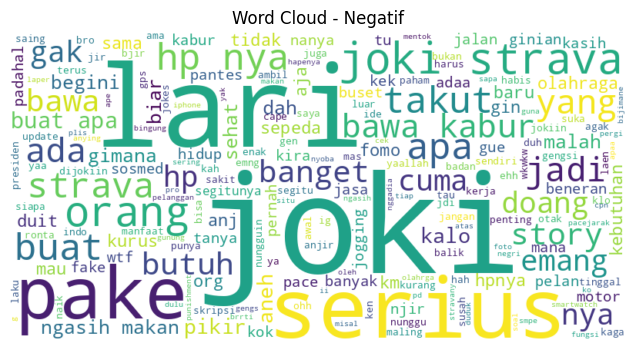

In [ ]:
# Merge all texts based on sentiment
positive_text = " ".join(df_clean[df_clean['Sentiment'] == 'Positif']['Comment'])
neutral_text = " ".join(df_clean[df_clean['Sentiment'] == 'Netral']['Comment'])
negative_text = " ".join(df_clean[df_clean['Sentiment'] == 'Negatif']['Comment'])

# Function wordcloud
def show_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Displaying wordcloud
show_wordcloud(positive_text, "Word Cloud - Positif")
show_wordcloud(neutral_text, "Word Cloud - Netral")
show_wordcloud(negative_text, "Word Cloud - Negatif")


## **E3. Distribution of comment_length**

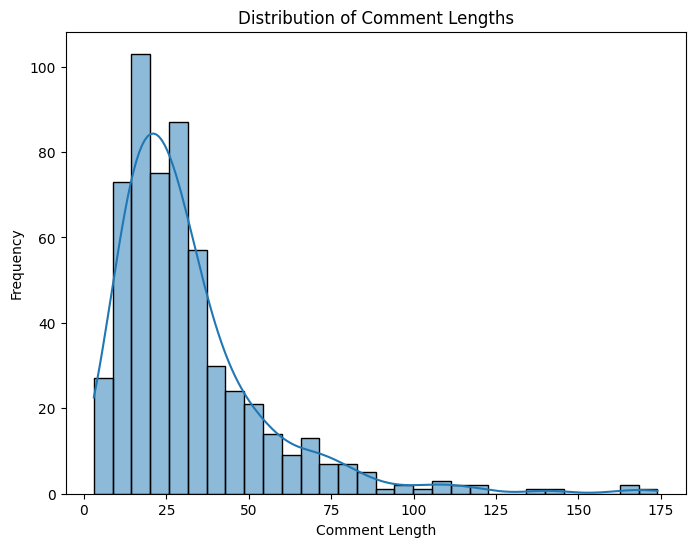

,Comment_Length
Sentiment,
Negatif,36.006667
Netral,28.130081
Positif,33.348837


In [ ]:
# Adding a new column for comment_length
df_clean['Comment_Length'] = df_clean['Comment'].apply(len)

# Analyzing the distribution of comment lengths
plt.figure(figsize=(8,6))
sns.histplot(df_clean['Comment_Length'], kde=True, bins=30)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

# Calculating the average comment length per sentiment
avg_comment_length_sentiment = df_clean.groupby('Sentiment')['Comment_Length'].mean()

avg_comment_length_sentiment


`Negatif`: Rata-rata panjang komentar adalah sekitar **36 karakter**.

`Netral`: Rata-rata panjang komentar adalah sekitar **28 karakter**.

`Positif`: Rata-rata panjang komentar adalah sekitar **33 karakter**.


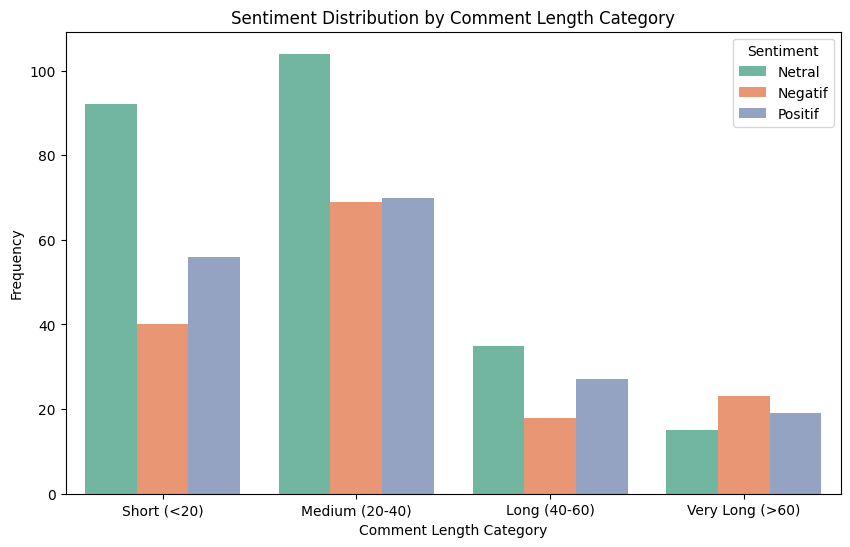

<ipython-input-13-cf16334bb553>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_length_category_distribution = df_clean.groupby(['Length_Category', 'Sentiment']).size().unstack()


Sentiment,Negatif,Netral,Positif
Length_Category,,,
Short (<20),40,92,56
Medium (20-40),69,104,70
Long (40-60),18,35,27
Very Long (>60),23,15,19


In [ ]:
# Analyze the sentiment distribution by length categories
# Defining length categories
bins = [0, 20, 40, 60, 1000]
labels = ['Short (<20)', 'Medium (20-40)', 'Long (40-60)', 'Very Long (>60)']
df_clean['Length_Category'] = pd.cut(df_clean['Comment_Length'], bins=bins, labels=labels, right=False)

# Plotting sentiment distribution across different length categories
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='Length_Category', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution by Comment Length Category')
plt.xlabel('Comment Length Category')
plt.ylabel('Frequency')
plt.show()

# Checking of each sentiment
sentiment_length_category_distribution = df_clean.groupby(['Length_Category', 'Sentiment']).size().unstack()

sentiment_length_category_distribution


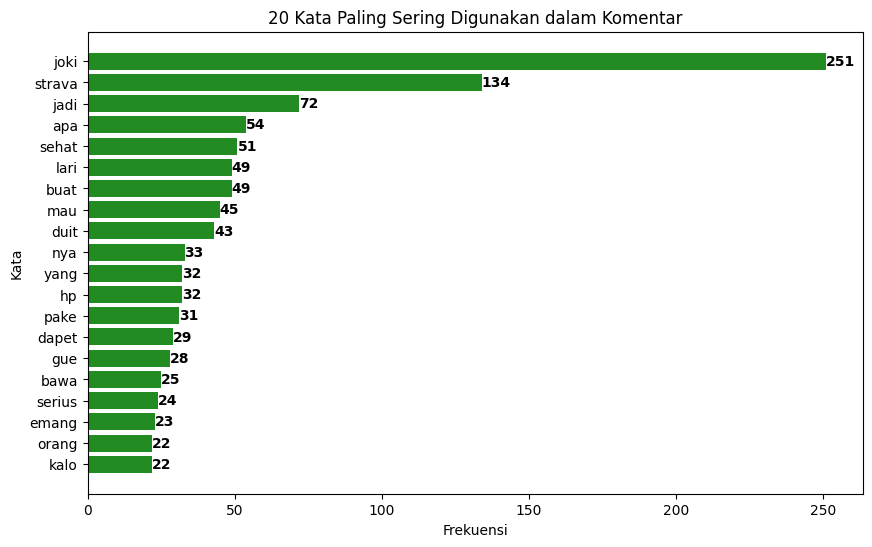

In [ ]:
# Using CountVectorizer without StopWords
vectorizer = CountVectorizer(max_features=20, stop_words=None)  # Hilangkan stop_words
X = vectorizer.fit_transform(df_clean['Comment'])

# Get word frequency
word_freq_new = np.asarray(X.sum(axis=0)).flatten()
words_new = vectorizer.get_feature_names_out()

# Create a DataFrame for word freq
word_freq_df_new = pd.DataFrame({'Kata': words_new, 'Frekuensi': word_freq_new})
word_freq_df_new = word_freq_df_new.sort_values(by='Frekuensi', ascending=False)

# Plot the 20 most frequent words
plt.figure(figsize=(10, 6))
bars = plt.barh(word_freq_df_new['Kata'], word_freq_df_new['Frekuensi'], color='forestgreen')

# Adding label freq
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())),
             va='center', ha='left', color='black', fontweight='bold')

plt.title('20 Kata paling sering digunakan dalam komentar')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
df_clean

,Comment,Sentiment,Comment_Length,Length_Category
0,joki strava bawa hp pas lari,Netral,28,Medium (20-40)
1,anjir sumpah yang joki strava,Netral,29,Medium (20-40)
2,misal jadi joki strava pelanggan kasih iphone ...,Negatif,71,Very Long (>60)
3,tidak naik sepeda stravany lari bukan strava s...,Negatif,72,Very Long (>60)
4,joki strava bawa pergi hp,Negatif,25,Medium (20-40)
...,...,...,...,...
580,pernah pas kerja ngidupin starva kerja jalanla...,Positif,114,Very Long (>60)
581,cara buka awal usaha ginian gimana hari atoga ...,Netral,62,Very Long (>60)
582,serius joki nya,Negatif,15,Short (<20)
583,mau open joki lumayan kardio dapet duit,Netral,39,Medium (20-40)


# **F. Insight**
*on PPT*

---


https://www.canva.com/design/DAGeeJewhIY/l73kFBlAFM_JZFzmY_1ruQ/edit?continue_in_browser=true